<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/Perceptron_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

- Perceptrons classify data by drawing linear decision boundaries and can only classify linear data.
- They are unable to classify non-linear data even if a single perceptron is left to run for a large number of epochs.
- This limitation of perceptrons is fixed by MLP(Multilayered perceptrons)

In [2]:
def generate_data(data_type):
    df = pd.DataFrame()
    df['X1'] = [0,0,1,1]
    df['X2'] = [0,1,0,1]

    if data_type=='or':
        df['y'] = [0,1,1,1]

    elif data_type=='and':
        df['y'] = [0,0,0,1]

    elif data_type=='xor':
        df['y'] = [0,1,1,0]

    plot_scatter(df)
    return df

def plot_scatter(df):
    plt.scatter(df['X1'],df['X2'],c=df['y'],s=100)
    plt.show()


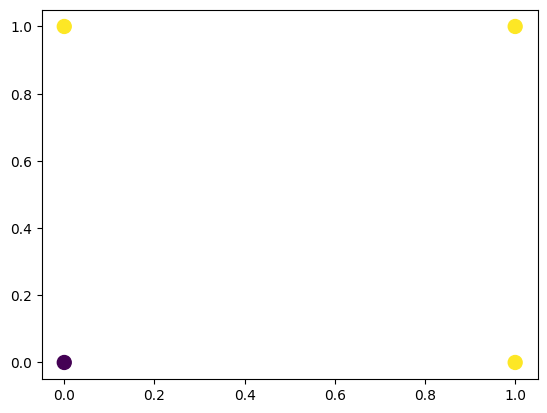

In [3]:
# generate the or data

df_or = generate_data('or')

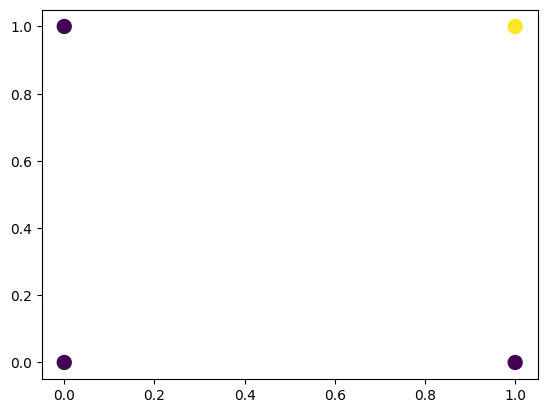

In [4]:
# generate the and data

df_and = generate_data('and')

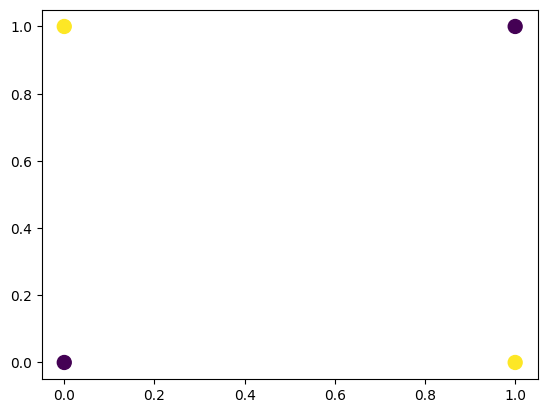

In [5]:
# generate the xor data

df_xor = generate_data('xor')

In [6]:
# make 3 perceptrons objects

from sklearn.linear_model import Perceptron

percep_or = Perceptron()
percep_and = Perceptron()
percep_xor = Perceptron()

In [7]:
# make decision boundaries of the objects

def decision_boundaries(X,y,clf,title):
    # fit the classifier on the data
    clf.fit(X,y)

    #create subplots
    fig,ax = plt.subplots(1,2,figsize=(12,5))

    # plot the decision regions
    plot_decision_regions(X.values,y.values,clf=clf,ax=ax[0])
    ax[0].set_title(f'Decision Boundary for {title} data')

    # get the bias and coef values
    coef,intercept = clf.coef_[0],clf.intercept_[0]

    # calculate the slope
    slope = -(coef[0])/coef[1]

    # calculate the bias
    bias = -(intercept)/coef[1]

    # plot the model line
    X_plot = np.linspace(0,1,100)
    # predict using the classifier
    y_pred = slope*X_plot + bias

    # plot the model line
    ax[1].plot(X_plot,y_pred,color='red')
    # plot the scatter plot for the data
    ax[1].scatter(X['X1'],X['X2'],c=y,s=100)
    ax[1].set_title(f'Decision Boundary for {title} data')

    plt.show()


In [8]:
# filter warnings
from warnings import filterwarnings

filterwarnings('ignore')

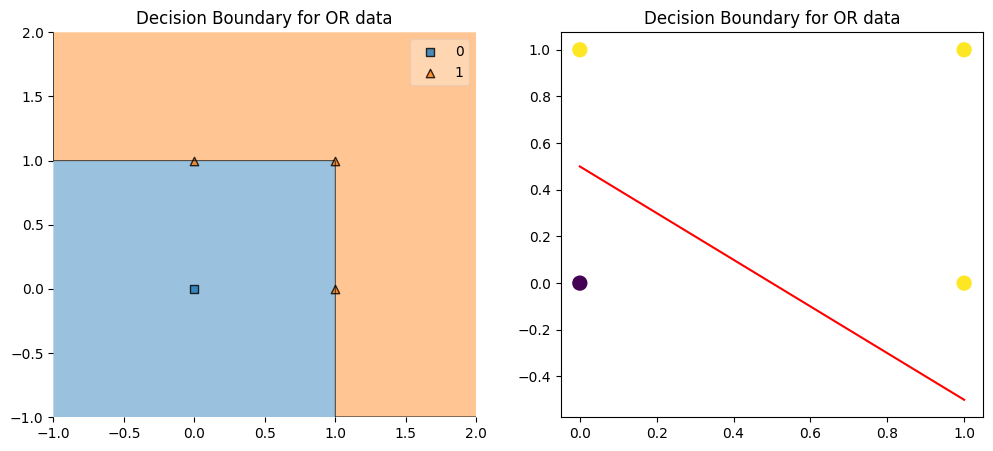

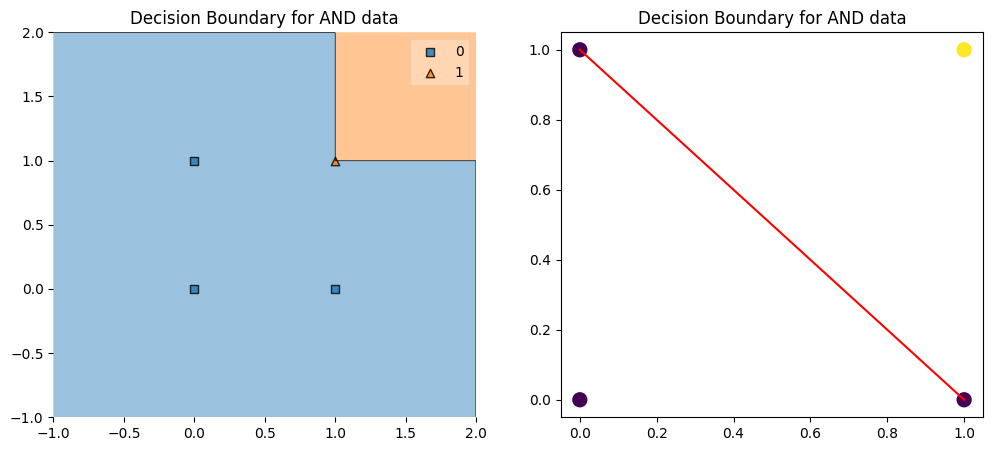

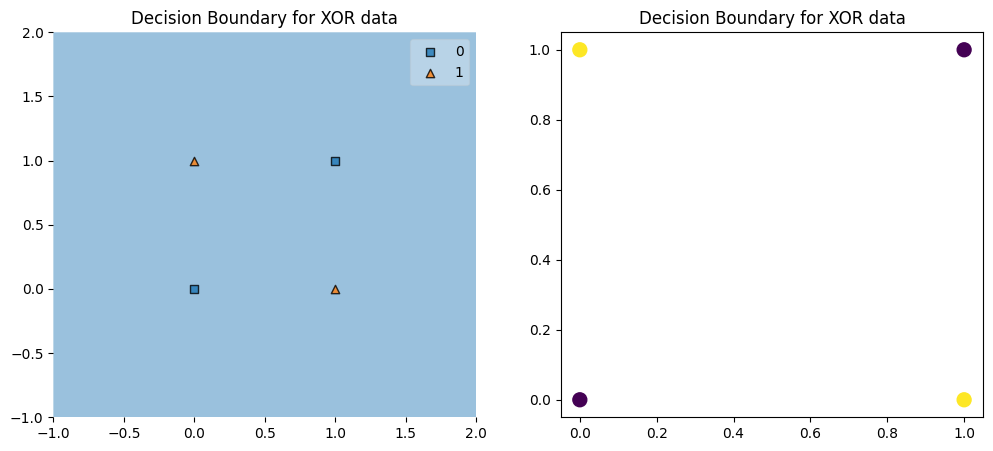

In [9]:
df_list = [df_or,df_and,df_xor]
clf_list = [percep_or,percep_and,percep_xor]
data_type = ['OR','AND','XOR']

for df,clf,dtype in zip(df_list,clf_list,data_type):
    X_temp = df.drop(columns='y')
    y_temp = df['y']
    decision_boundaries(X_temp,y_temp,clf,dtype)


## Use ANN

Use MLP with 50 nodes each and 5 hidden layers and 1 output layer to work on the XOR data

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# make the model

model = Sequential()

# add the first hidden layer with 50 nodes
model.add(Dense(units=50,activation='sigmoid',input_dim=2))
# add the second hidden layer with 50 nodes
model.add(Dense(units=50,activation='sigmoid'))
# add the third hidden layer with 50 nodes
model.add(Dense(units=50,activation='sigmoid'))
# add the fourth hidden layer with 50 nodes
model.add(Dense(units=50,activation='sigmoid'))
# add the fifth hidden layer with 50 nodes
model.add(Dense(units=50,activation='sigmoid'))
# add the output layer
model.add(Dense(units=1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# generate the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                150       
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401

In [22]:
# make X and y of the Xor data
X_xor = df_xor.drop(columns='y')
y_xor = df_xor['y']

# fit the model on the data
model.fit(X_xor,y_xor,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 11/1000


9600/9600 [==============================] - 19s 2ms/step


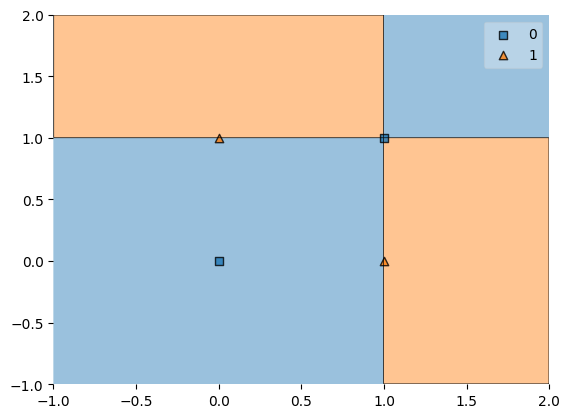

In [23]:
# plot the decision boundary

plot_decision_regions(X_xor.values,y_xor.values,clf=model)
plt.show()

In [24]:
# evaluate the model
model.evaluate(X_xor,y_xor)

1/1 [==============================] - 0s 213ms/step - loss: 4.3577e-04 - accuracy: 1.0000


[0.0004357722064014524, 1.0]